In [1]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

In [2]:
model=ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 0s 0us/step


In [3]:
def prepare_image(image,target):
  #giriş görüntüsünü yeniden boyutlandırma
  image=image.resize(target)
  image=img_to_array(image)
  image=np.expand_dims(image,axis=0)
  image=imagenet_utils.preprocess_input(image)

  #işlenmis görüntü
  return image

In [5]:
#@title Default title text { vertical-output: true }
ImageURL = "https://imgix.bustle.com/uploads/image/2018/4/9/471897e4-4a04-4373-9112-53c381928d89-shutterstock_1064524748.jpg?w=970&h=582&fit=crop&crop=faces&auto=format&q=70\"" #@param {type:"string"}


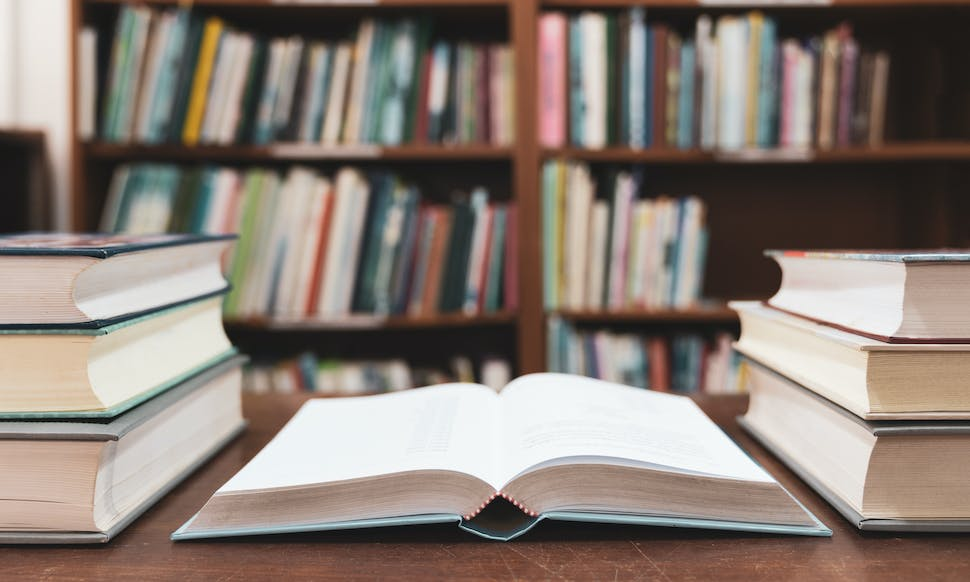

In [6]:

#ImageURL = "https://imgix.bustle.com/uploads/image/2018/4/9/471897e4-4a04-4373-9112-53c381928d89-shutterstock_1064524748.jpg?w=970&h=582&fit=crop&crop=faces&auto=format&q=70
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image


In [7]:

data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # 224 x 224 boyutlu hale getir

preds = model.predict(pre_image) # Kesirim modeline ön işlemden geçmiş görüntüyü uygula

results = imagenet_utils.decode_predictions(preds) #kestirim
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: # ImageNet veri kümseinden etiket, olasılık ve kestrim sonucunu al
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)

data["success"] = True

print(data)

35363/35363 [==============================] - 0s 0us/step
{'success': True, 'predictions': [{'label': 'library', 'probability': 0.8336004614830017}, {'label': 'bookshop', 'probability': 0.12999227643013}, {'label': 'bookcase', 'probability': 0.034101951867341995}, {'label': 'binder', 'probability': 0.0006648124544881284}, {'label': 'book_jacket', 'probability': 0.0002544873859733343}]}


In [8]:

print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"]))
# En yüksek olasılıklı sonucu ekrana yazdır


Sınıflandırma tahmini en yüksek olan 0.8336004614830017 oranıyla library'dır.
